In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
from sklearn.utils import resample

In [2]:
path = "/Users/grai/Data_log/"
df_original = pd.read_csv(path+'ghost_data.csv.gz')

In [160]:
df_original.shape

(5069268, 18)

In [161]:
df_original.head()

,timestamp,cp_code,request_id,obj_size,bytes_served,new_connection,origin_hit,system_buffer,hoc,gzip_unzip,ssl,cca_bbr,ocl,phtm_usecs,gzu_usecs,agg_flytes,cpu_flytes,mdt_application_usecs
0,1.626074e+09,111,13,16097,16097,1,0,0,0,0,1,1,0,0,0,0,0,0
1,1.626074e+09,111,21,27194,27194,1,0,0,0,0,1,1,0,0,0,0,0,0
2,1.626074e+09,111,30,5719,5719,1,0,0,0,0,1,1,0,0,0,0,0,0
3,1.626074e+09,111,3e,786472,786472,1,0,0,0,0,1,1,0,30822,0,0,0,0
4,1.626074e+09,1,4a,102400,102400,1,1,0,0,1,0,1,497,5518,166,7337,82763,434


In [162]:
df = df_original.copy()

# Bootstrapping the mdt_application_usecs

In [146]:
mdt=np.zeros(10000000)
for i in range(10000000):
    df1= resample(df_original, replace=True, n_samples=20)
    mdt[i]=(np.mean(df.mdt_application_usecs))

In [147]:
lim=outlier_limits(pd.Series(mdt))
lim

(118.27499999999999, 148.875)

In [148]:
mdt=mdt[(mdt>=lim[0])&(mdt<=lim[1])]

In [151]:
mdt.shape

(9593076,)

<Figure size 720x720 with 0 Axes>

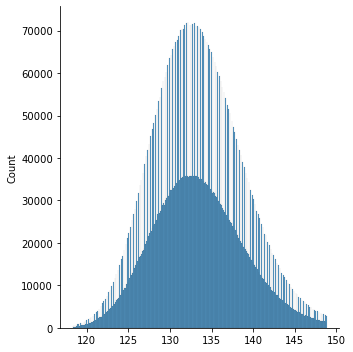

In [152]:
plt.figure(figsize=(10,10))
sns.displot(mdt)

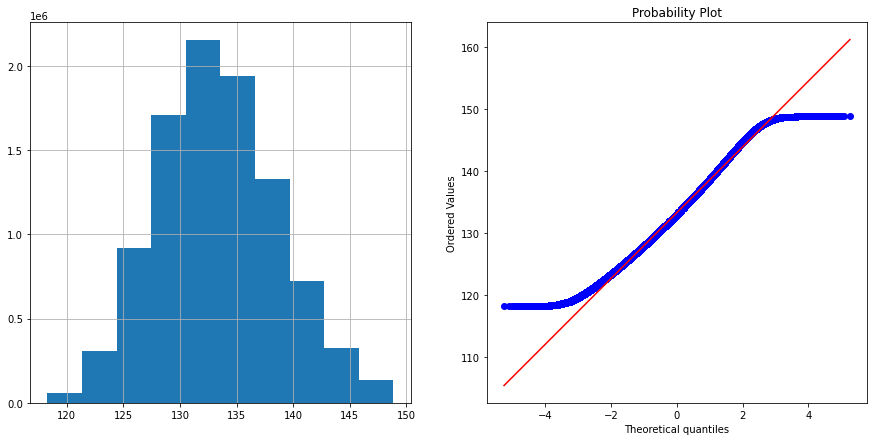

In [149]:
diagnostic_plot(pd.Series(mdt))

In [156]:
lim=outlier_limits(df_original.mdt_application_usecs)
lim

(77.5, 185.5)

In [157]:
mdt_original=df_original.mdt_application_usecs[(df_original.mdt_application_usecs>=lim[0])&(df_original.mdt_application_usecs<=lim[1])]

<Figure size 720x720 with 0 Axes>

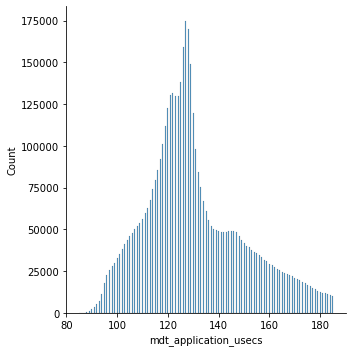

In [158]:
plt.figure(figsize=(10,10))
sns.displot(mdt_original)

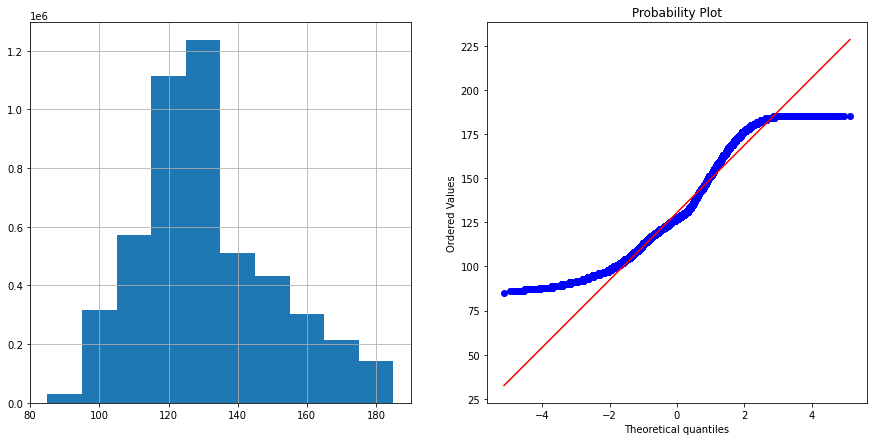

In [159]:
diagnostic_plot(pd.Series(mdt_original))

# We can clearly see that the bootstrapping method is showing the clear parent distribution of the mdt_application_usecs and disturbances present in it is clearly visible as 2 distributions